In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

folder = '../Data/test/images'

for filename in os.listdir(folder):
    print(filename)

for filename in os.listdir(folder):
    img = cv.imread(os.path.join(folder,filename))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret,thresh = cv.threshold(img,100,255,cv.THRESH_BINARY_INV)
    img_name = filename.replace("rgb", "msk")
    cv.imwrite(f"../Data/test/masks/{img_name}", thresh)

In [2]:
#img = cv.imread('wire.jpg')
img = cv.imread('../Data/sample images/3.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.resize(img, (400, 400))

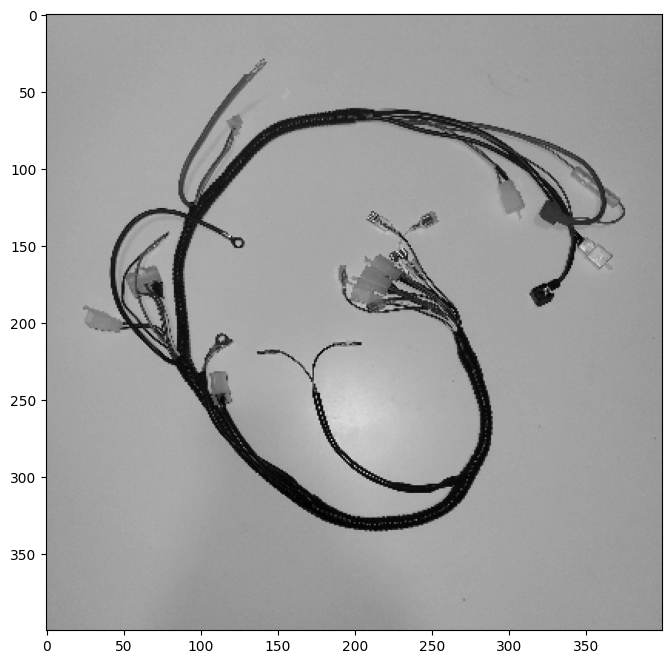

In [3]:
plt.subplots(figsize=(10,8)),plt.imshow(img, 'gray', vmin=0, vmax=255)
plt.show()

In [4]:
_,thresh2 = cv.threshold(img,100,255,cv.THRESH_BINARY_INV)

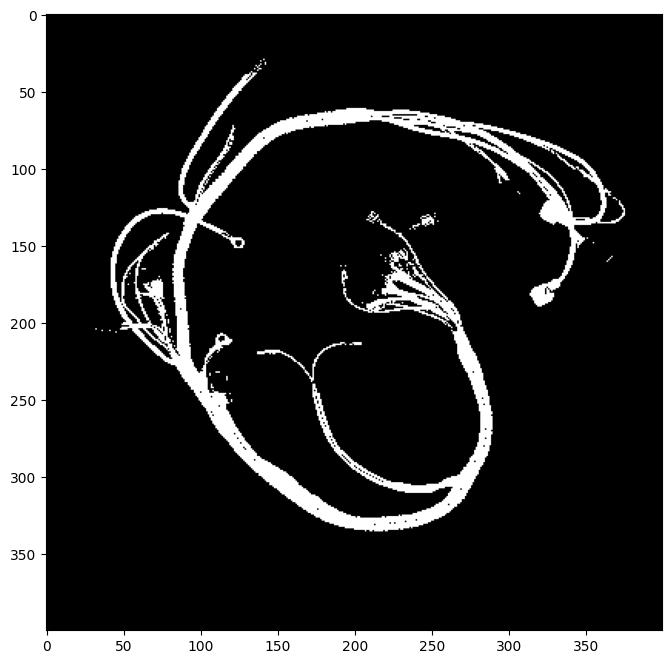

In [5]:
plt.subplots(figsize=(10,8)),plt.imshow(thresh2, 'gray')
plt.show()

contours, _= cv.findContours(thresh2, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

len(contours)

contours_clean = []
for c in contours:
    area = cv.contourArea(c)
    if area > 5.0:
        contours_clean.append(c)

len(contours_clean)

cont_index = np.array(areas).argmax()
wire_cont = contours[cont_index]

#new_mask = cv.drawContours(thresh2, [wire_cont], -1, color=(255, 255, 255), thickness=cv.FILLED)
new_mask = cv.drawContours(thresh2, contours_clean, -1, color=(255, 255, 255), thickness=cv.FILLED)

plt.subplots(figsize=(10,8)),plt.imshow(new_mask, 'gray')
plt.show()

In [12]:
points = np.transpose(np.nonzero(thresh2))

In [13]:
points

array([[ 29, 141],
       [ 30, 139],
       [ 31, 142],
       ...,
       [335, 218],
       [335, 220],
       [335, 221]], dtype=int64)

In [14]:
clustering = AgglomerativeClustering(n_clusters=40, linkage="average")

In [15]:
clustering.fit(points)

AgglomerativeClustering(linkage='average', n_clusters=40)

In [16]:
clustering.labels_

array([17, 17, 17, ...,  1,  1,  1], dtype=int64)

In [17]:
df = pd.DataFrame(points)
df['cluster'] = clustering.labels_
df.columns = ['Y', 'X', 'clusters']
df['Y'] = df['Y'] * (-1)

In [18]:
df['clusters'].unique()

array([17, 15, 10, 31, 36, 32, 39, 14,  8,  9, 38, 28, 24,  6, 11, 34, 35,
        7, 27,  5, 16,  2, 21, 37, 25,  4, 20, 33,  0, 29, 18, 12,  3, 23,
       19, 26, 13, 22,  1, 30], dtype=int64)

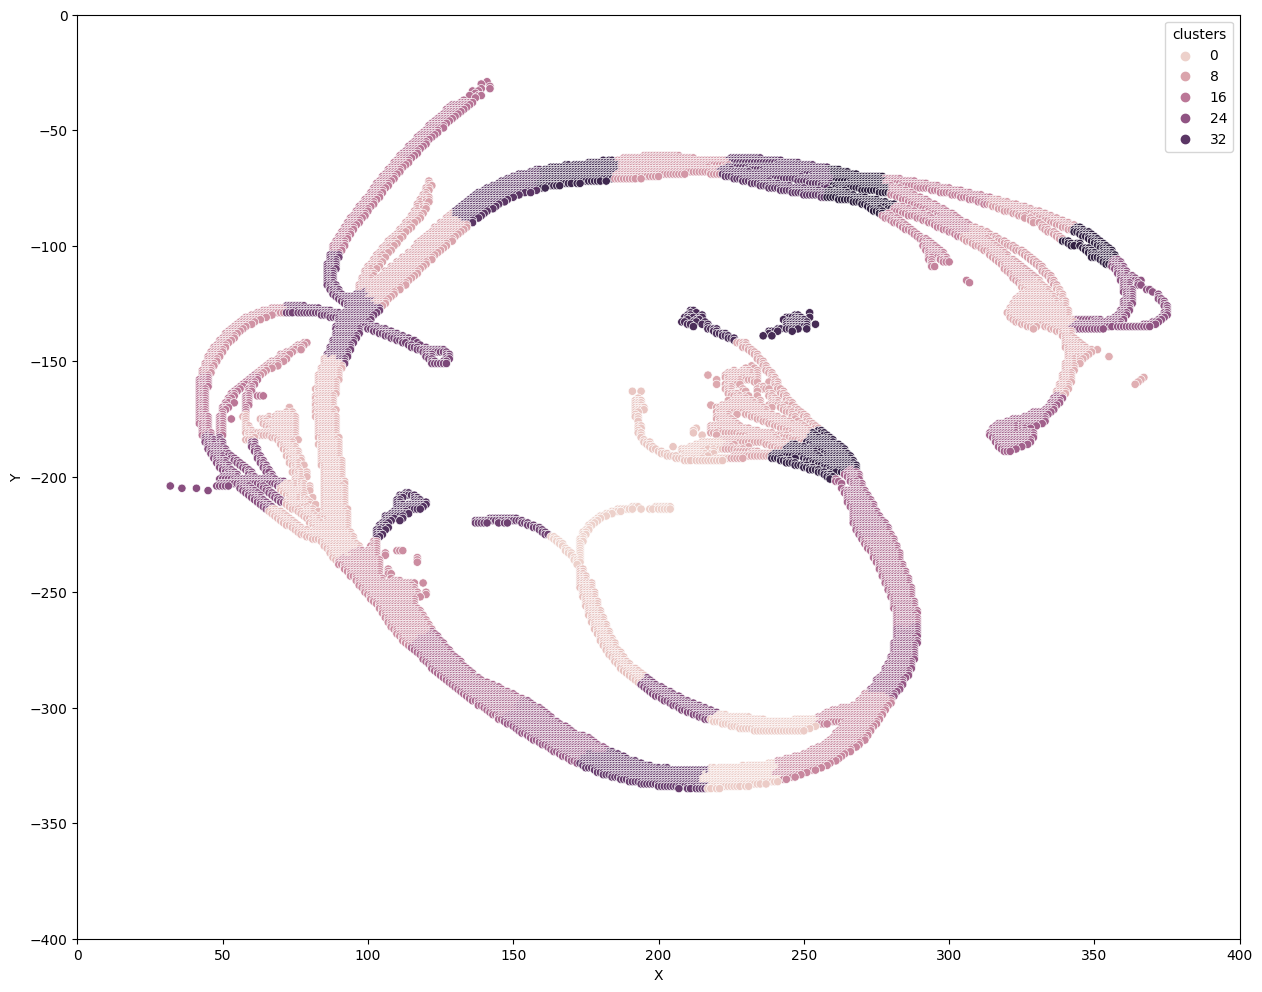

In [19]:
fig,ax = plt.subplots(figsize=(15,12))
sns.scatterplot(data=df, x="X", y='Y', hue="clusters", ax=ax)
_=ax.set_xlim(0,400)
_=ax.set_ylim(-400,0)

In [20]:
dfg = df.groupby('clusters').agg({'X':[np.mean], 'Y':[np.mean]}).reset_index()
dfg.columns = ['cluster', 'X_cent', 'Y_cent']

In [21]:
dfg

,cluster,X_cent,Y_cent
0,0,180.268293,-222.609756
1,1,232.236585,-319.400000
2,2,208.242236,-185.093168
3,3,181.600877,-265.842105
4,4,84.103989,-210.780627
5,5,78.910891,-171.329208
6,6,335.050420,-134.252101
7,7,233.731629,-173.162939
8,8,114.028986,-104.204710
9,9,322.747899,-98.033613


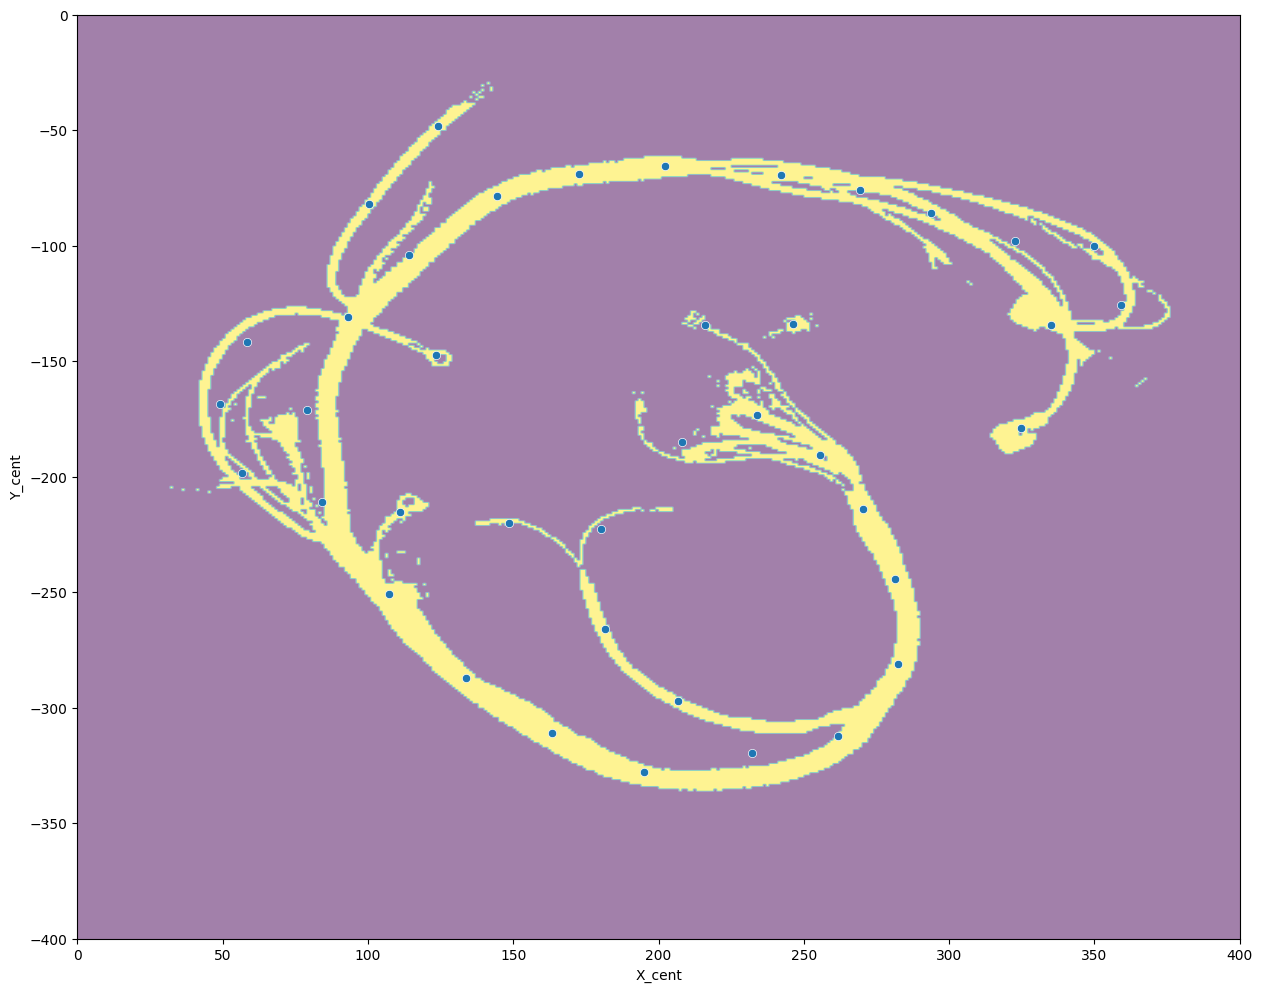

In [22]:
fig,ax = plt.subplots(figsize=(15,12))
sns.scatterplot(data=dfg, x="X_cent", y='Y_cent', ax=ax)
#_=ax.set_xlim(0,400)
#_=ax.set_ylim(-400,0)
plt.xlim(0, 400)
plt.ylim(-400, 0)
ax.imshow(thresh2, extent=[0, 400, -400, 0], aspect='auto', alpha=0.5)